# Customer Churn Analysis
Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

### Importing Required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Importing Dataset

In [2]:
df=pd.read_csv("Telecom_customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

The dataset is having 7043 rows and 21 columns

In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

The dataset have no null values

<AxesSubplot:>

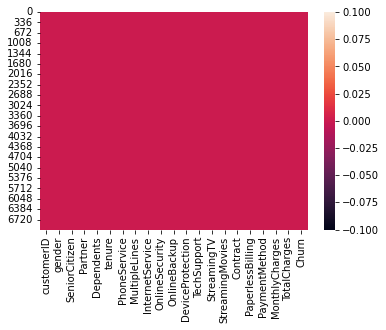

In [5]:
#Lets visualize using heatmap
sns.heatmap(df.isnull())


In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

we can see that target column having continous value but it is showing object datatype.so handle this column

In [8]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [9]:
df.loc[df['TotalCharges']==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


After some observation we found that column (Total charges) has white spaces.

In [10]:
df['TotalCharges']=df['TotalCharges'].replace(" ",np.nan)

In [11]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
#converting column type from object to float
df['TotalCharges']=df['TotalCharges'].astype(float)

In [13]:
df.TotalCharges.dtype

dtype('float64')

Now we see total charges column datatype has been changed to Float

In [14]:
df.iloc[6670,:]

customerID            4075-WKNIU
gender                    Female
SeniorCitizen                  0
Partner                      Yes
Dependents                   Yes
tenure                         0
PhoneService                 Yes
MultipleLines                Yes
InternetService              DSL
OnlineSecurity                No
OnlineBackup                 Yes
DeviceProtection             Yes
TechSupport                  Yes
StreamingTV                  Yes
StreamingMovies               No
Contract                Two year
PaperlessBilling              No
PaymentMethod       Mailed check
MonthlyCharges             73.35
TotalCharges                 NaN
Churn                         No
Name: 6670, dtype: object

In [15]:
# we see total charges columns has some space which is replaced by nan
#handling nan with mean# 
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].mean())

we see total charges columns has some space which is replaced by nan
handling nan with mean

In [16]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [17]:
  df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.000,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.500,70.35,89.85,118.75
TotalCharges,7043.0,2283.300441,2265.000258,18.80,402.225,1400.55,3786.60,8684.80


This gives the statistical information of the numerical columns. The summary of the dataset looks perfect since there is no negative/incvalid values present.

From the above description we can observe the following:-

.The counts of all the columns are same which means there are no missing values in the dataset.

The mean value is greater than the median(50%) in tenure and TotalCharges columns which means the data is skewed to right in these column.

.The data in the column MonthlyCharges have mean value less than median which means the data is skewed to left.
By summarizing the data we can observe there is a huge differences between 75% and max hence there are outliers present int he data.

.We can also notice the Standard deviation, min, 25% percentile values from this describe method.

### Lets separating categorical varibale and continous varibales

In [19]:
#Checking for Categorical columns
Cat_col = []
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        Cat_col.append(i)
print(Cat_col)

['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [20]:
# Checking for Continous columns
num_col = []
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        num_col.append(i)
print(num_col)

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [21]:
df['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

These are two categories present in the target column namely "Yes" and "No"



In [22]:
# Checking number of unique values in each column
df.nunique().to_frame("No. of unique values")

,No. of unique values
customerID,7043
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


# EDA

### Univariate Analysis

In [23]:
df_cat=df[Cat_col]

Male      3555
Female    3488
Name: gender, dtype: int64


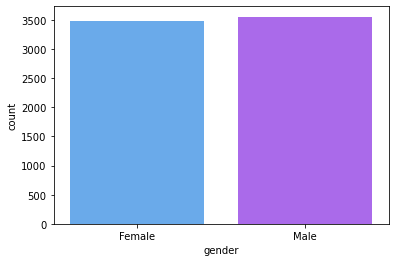

In [24]:
ax=sns.countplot(x='gender',data=df_cat,palette='cool')
print(df_cat['gender'].value_counts())

We can observe that male and female customers are almost equal in numbers

No     3641
Yes    3402
Name: Partner, dtype: int64


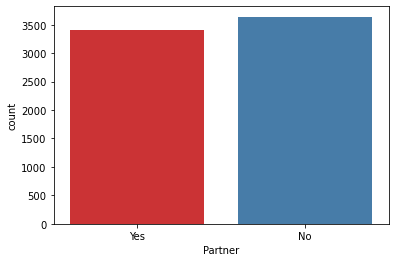

In [25]:
ax=sns.countplot(x='Partner',data=df_cat,palette='Set1')
print(df_cat['Partner'].value_counts())

Non partners are bit high in count of customers having partners.

No     4933
Yes    2110
Name: Dependents, dtype: int64


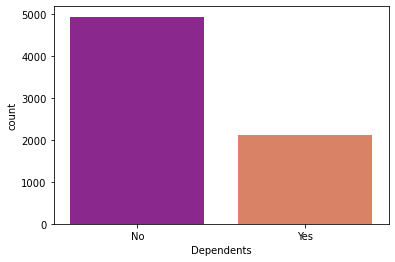

In [26]:
ax=sns.countplot(x='Dependents',data=df_cat,palette='plasma')
print(df_cat['Dependents'].value_counts())

The customers who have dependents are less compared to non dependents.

Yes    6361
No      682
Name: PhoneService, dtype: int64


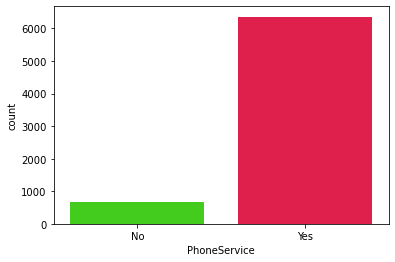

In [27]:
ax=sns.countplot(x='PhoneService',data=df_cat,palette='prism')
print(df_cat['PhoneService'].value_counts())

The customers who have phone services are large in numbers and who do not own phone services are very less in number.

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


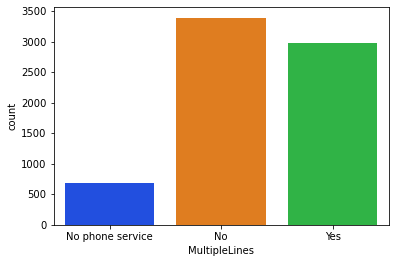

In [28]:
ax=sns.countplot(x='MultipleLines',data=df_cat,palette='bright')
print(df_cat['MultipleLines'].value_counts())

The customers having phoneservices from single line have high counts compared to the customers having phone services from multiple lines, also the customers who do not have phone services have covered very less data compared to others.

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


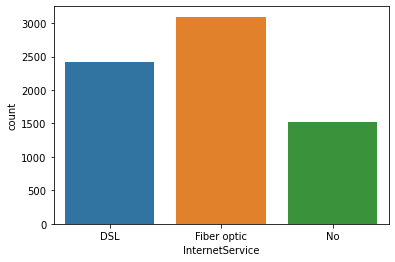

In [29]:
ax=sns.countplot(x='InternetService',data=df_cat)
print(df_cat['InternetService'].value_counts())

The customers having NoInternetServices needs online security and who do not own any internet services, they do not need any online security. But from the plot we can observe the majority of customers who have internet serviceshave low online security.

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


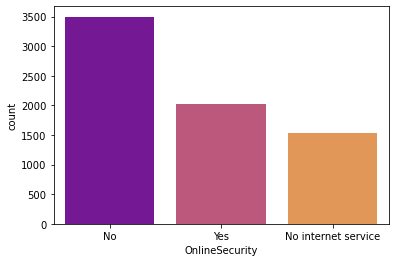

In [30]:
ax=sns.countplot(x='OnlineSecurity',data=df_cat,palette='plasma')
print(df_cat['OnlineSecurity'].value_counts())

The customers having NoInternetServices needs online security and who do not own any internet services, they do not need any online security. But from the plot we can observe the majority of customers who have internet serviceshave low online security.



No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


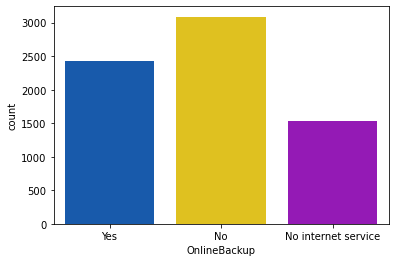

In [31]:
ax=sns.countplot(x='OnlineBackup',data=df_cat,palette='prism')
print(df_cat['OnlineBackup'].value_counts())

We can observe that the customers having no internet services have very les online backup counts compared to others.

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


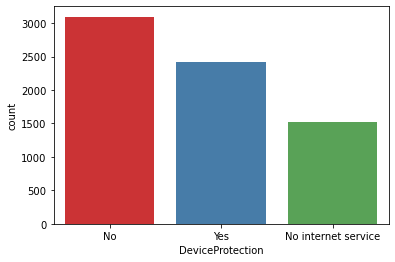

In [32]:
ax=sns.countplot(x='DeviceProtection',data=df_cat,palette='Set1')
print(df_cat['DeviceProtection'].value_counts())

We can see that the customers who do not have internet access, they do not need any device protection.

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


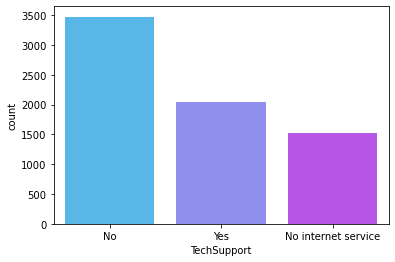

In [33]:
ax=sns.countplot(x='TechSupport',data=df_cat,palette='cool')
print(df_cat['TechSupport'].value_counts())

The customers who do not need any technical support are high in counts compared to the customers who need technical support.

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


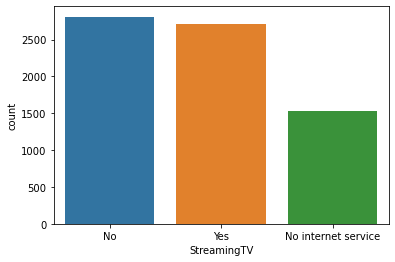

In [34]:
ax=sns.countplot(x='StreamingTV',data=df_cat)
print(df_cat['StreamingTV'].value_counts())

The customerswho do not use streaming TV have little bit high in numbers than the customers who do use Streaming TV.And the customer who do not own internet they do not have this service much.

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


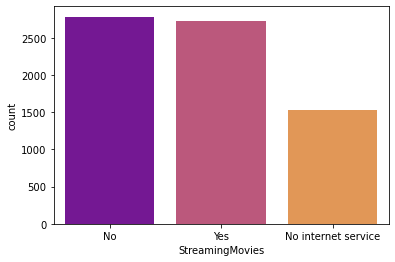

In [35]:
ax=sns.countplot(x='StreamingMovies',data=df_cat,palette='plasma')
print(df_cat['StreamingMovies'].value_counts())

The customers who do not have Streaming movies are high in count followed by the customers who have Streaming movies services. And the customers who do not have internet services, they have less streaming movies services compared to others.

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


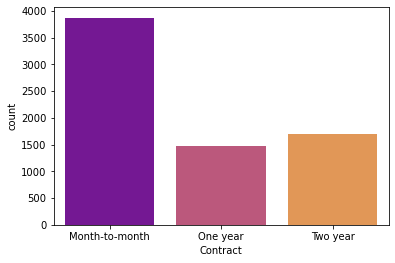

In [36]:
ax=sns.countplot(x='Contract',data=df_cat,palette='plasma')
print(df_cat['Contract'].value_counts())

We can observe that customers usually take monthly connection

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


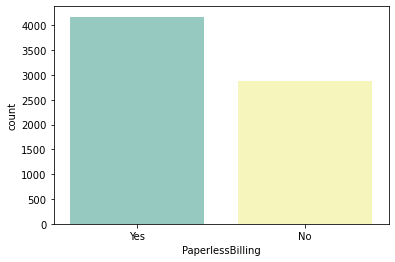

In [37]:
ax=sns.countplot(x='PaperlessBilling',data=df_cat,palette='Set3')
print(df_cat['PaperlessBilling'].value_counts())

Most of the customers prefer paper billing and average number of customers who do not prefer paper less billing, they may like to recive paper billing.

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


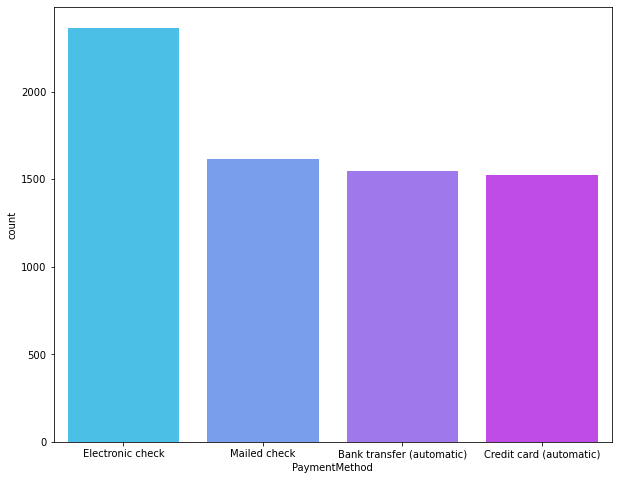

In [38]:
plt.figure(figsize=(10,8))
ax=sns.countplot(x='PaymentMethod',data=df_cat,palette='cool')
print(df_cat['PaymentMethod'].value_counts())

Most customers prefer Electronic check payment method and the customers who prefer Mailed Check, bank transfer and Credit card have average in count.

No     5174
Yes    1869
Name: Churn, dtype: int64


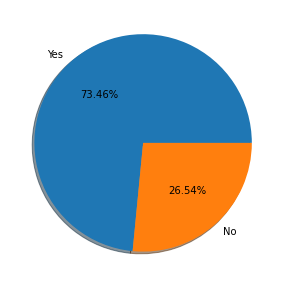

In [39]:
print(df['Churn'].value_counts())
labels='Yes','No'
fig,ax = plt.subplots(figsize=(15,5))
ax.pie(df['Churn'].value_counts(),labels=labels,autopct='%1.2f%%',shadow=True,)
plt.show()

We can observe that count of churn is greater than retention.Also target variable is imabalanced and need to be balanced

In [40]:
df_cont=df[num_col]

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


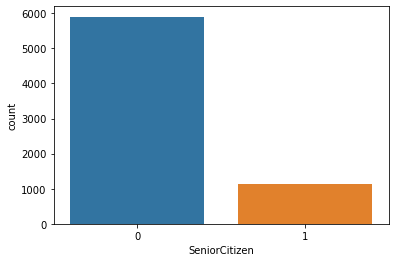

In [41]:
ax=sns.countplot(x='SeniorCitizen',data=df_cont)
print(df_cont['SeniorCitizen'].value_counts())

Here 0 represents non senior citizens and 1 represents senior citizens. The count of 0 is high compared to 1 which means the number of non seniorcitizens are quite high compared to senior citizens data int he dataset.

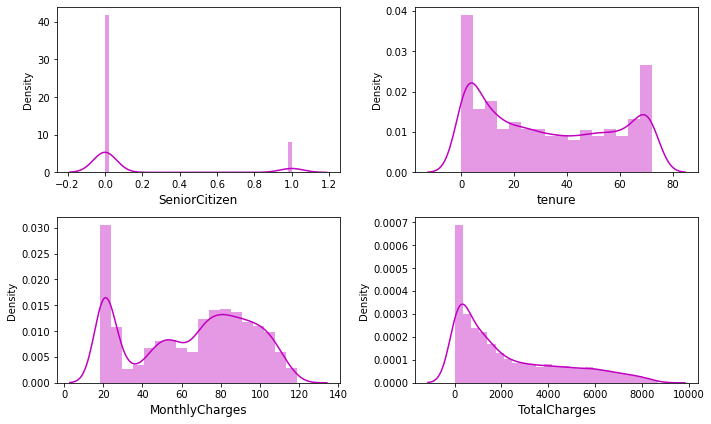

In [42]:
# Let's check how the data has been distributed in remaining column
plt.figure(figsize=(10,6),facecolor="white")
plotnumber =1
for col in num_col:
    if plotnumber<=4:
        ax= plt.subplot(2,2,plotnumber)
        sns.distplot(df[col],color="m")
        plt.xlabel(col,fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

From the above distribution plots we can notice that the data almost looks normal in all the columns except SeniorCitizen. And the data in the column TotalCharges is skewed to the right. Other two columns tenure and MonthlyCharges do not have skewness.

### Bivariate Analysis

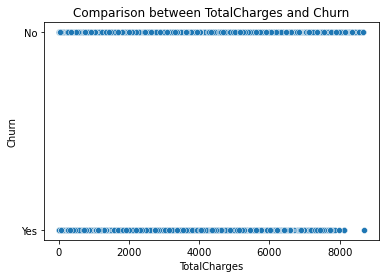

In [43]:
# Comparing TotalCharges and Churn
plt.title("Comparison between TotalCharges and Churn")
sns.scatterplot(x = "TotalCharges",y="Churn",data = df)
plt.show()

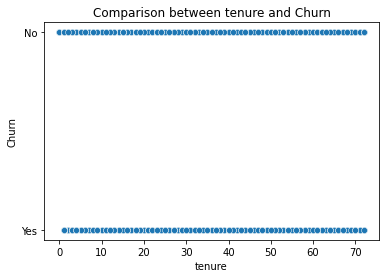

In [44]:
# Comparing tenure and Churn
plt.title("Comparison between tenure and Churn")
sns.scatterplot(x = "tenure",y="Churn",data = df)
plt.show()

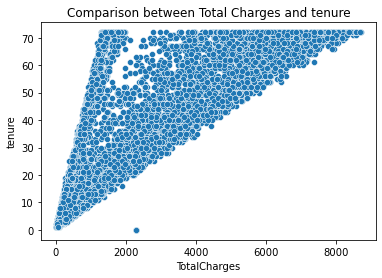

In [45]:
# Comparing tenure and TotalCharges
plt.title("Comparison between Total Charges and tenure")
sns.scatterplot(x = "TotalCharges",y="tenure",data = df,palette='Set1',markers=False)
plt.show()

Here we can notice the strong linear relation between the features.

As the tenure increses, TotalCharges also increases rapidly. If the customers have low tenure services than there is high chance of churn.

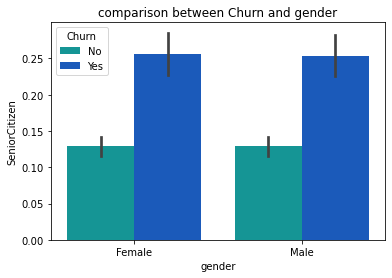

In [46]:
# Comparing gender and SeniorCitizen on the basis of Churn
plt.title("comparison between Churn and gender")
sns.barplot(x='gender',y='SeniorCitizen',data=df,palette='winter_r',hue='Churn')
plt.show()

There is no significant difference between the columns. The customers churns remains unaffected in gender and SeniorCitizen case.

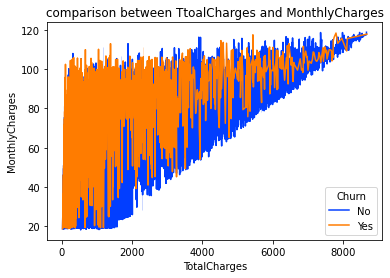

In [47]:
# Comapring TotalCharges and MonthlyCharges
plt.title("comparison between TtoalCharges and MonthlyCharges")
sns.lineplot(x="TotalCharges",y="MonthlyCharges",data=df,hue="Churn",palette="bright")
plt.show()

---There is a linear relationship between the features. The customer with high monthly charges have high tendency to stop the services since they have high total charges.

---Also if the customers ready to contribute with the monthly chargesthen there is an increment int he total charges.

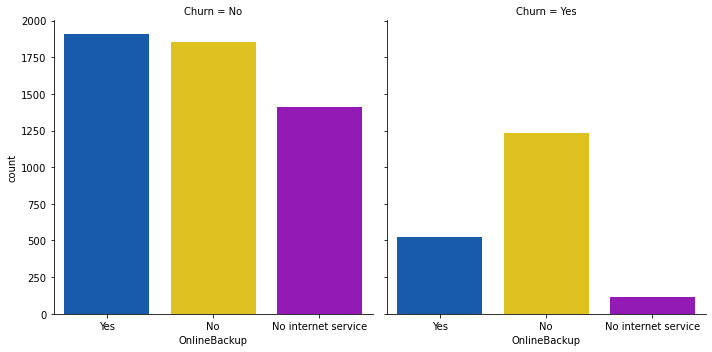

In [48]:
# Checking Churn level in OnlineBackup
sns.catplot(x='OnlineBackup',col='Churn',palette="prism",kind="count",data=df)
plt.show()

t is also same as in the case of online security. It is obvious that the customers having who do not have internet services they do not need any online backup. The customers who do not have online backup services they have high churn rate.

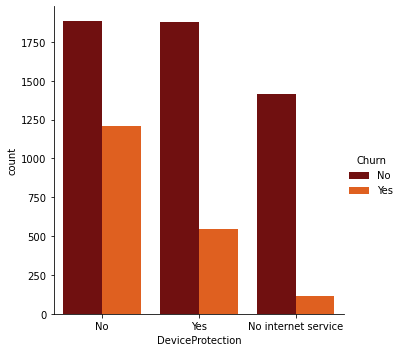

In [49]:
# Checking Churn level in DeviceProtecion
sns.catplot(x='DeviceProtection',hue='Churn',palette="gist_heat",kind="count",data=df)
plt.show()

The customers who do not own any Device protection have very high churn rate compared to others.

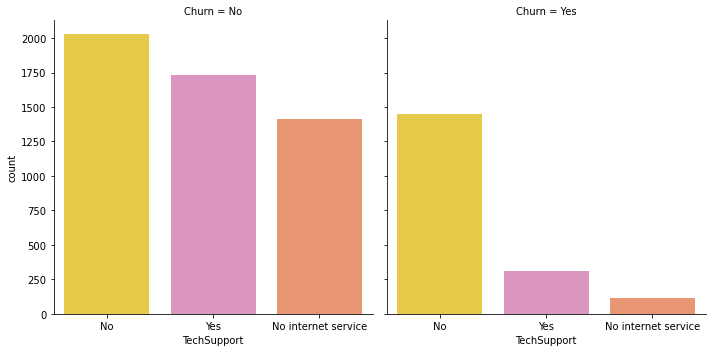

In [50]:
# Checking Churn level in TechSupport
sns.catplot(x='TechSupport',col='Churn',palette="Set2_r",kind="count",data=df)
plt.show()

Here we can clearly see that the customers who do not have any techsupport then they have high churn ratio

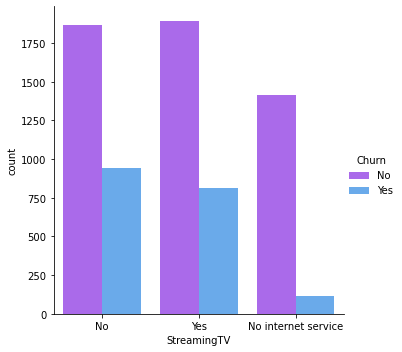

In [51]:
# Checking Churn level in StreamingTV
sns.catplot(x='StreamingTV',hue='Churn',palette="cool_r",kind="count",data=df)
plt.show()

The churn rate is nearly same if the customer own StreamingTV or not.

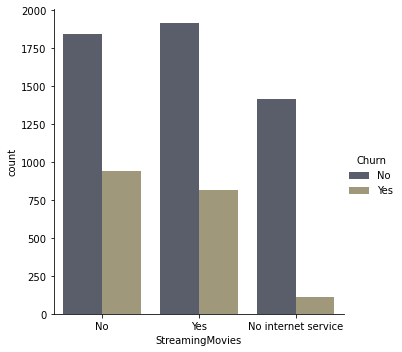

In [52]:
# Checking Churn level in StreamingMovies
sns.catplot(x='StreamingMovies',hue='Churn',palette="cividis",kind="count",data=df)
plt.show()


The customers who are existing in the company they do not own StreamingMovies in their devices. And the churn rate is low when the customer do not have internet services.

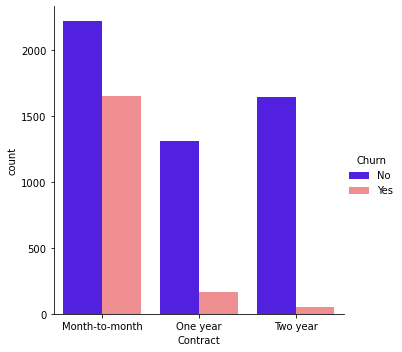

In [53]:
# Checking Churn level in Contract
sns.catplot(x='Contract',hue='Churn',palette="gnuplot2",kind="count",data=df)
plt.show()

The customers who have churned are mostly having month to month contract.

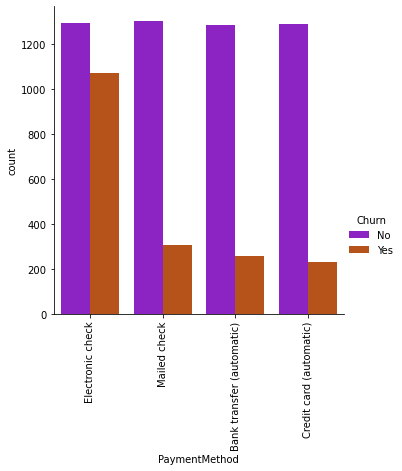

In [54]:
# Checking Churn level in PaymentMethod
sns.catplot(x='PaymentMethod',hue='Churn',palette="gnuplot",kind="count",data=df)
plt.xticks(rotation=90)
plt.show()


The customers who prefer Electronic check have high churn rate also the customers who existing in the company uses equal payment method.

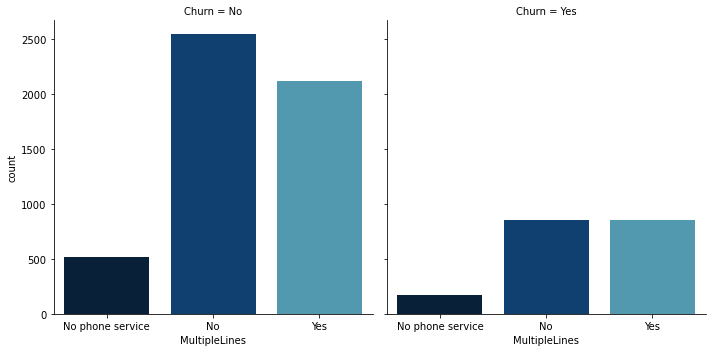

In [55]:
# Checking Churn level and MultipleLines
sns.catplot(x= 'MultipleLines',col='Churn',palette="ocean",kind="count",data=df)
plt.show()

The customers who have phone services from single line have high churn rate compared to the customers having phone services from multiple lines, also there are very less number of customers who do not have phone services.

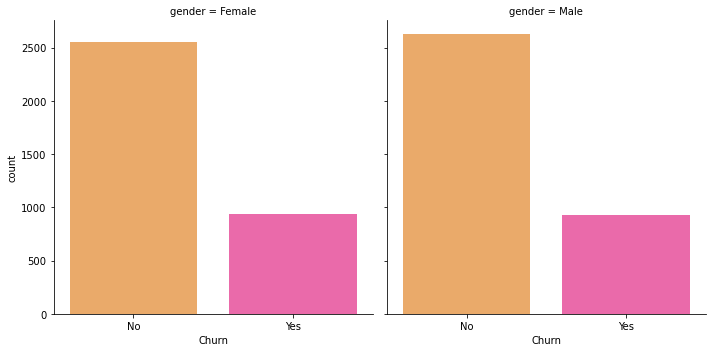

In [56]:
# Checking Churn level and gender
sns.catplot(x='Churn',col='gender',data=df,kind="count",palette="spring_r")


we can see there is no significance difference in the genders, both the genders have equal churn level.

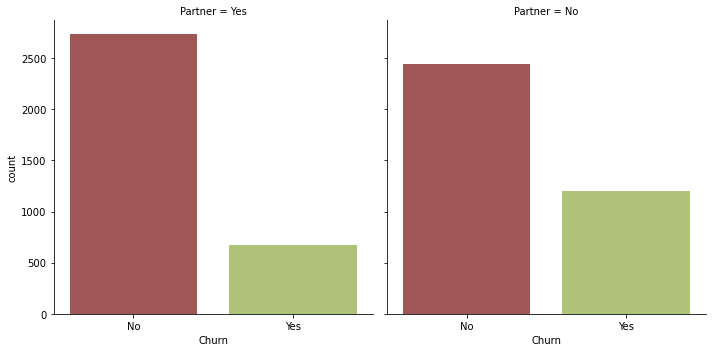

In [57]:
# Checking Churn level and Partner
sns.catplot(x='Churn',col='Partner',data=df,palette='tab20b_r',kind="count")

 we can see the customers without partners have high churn rate compared to the customers with partners.


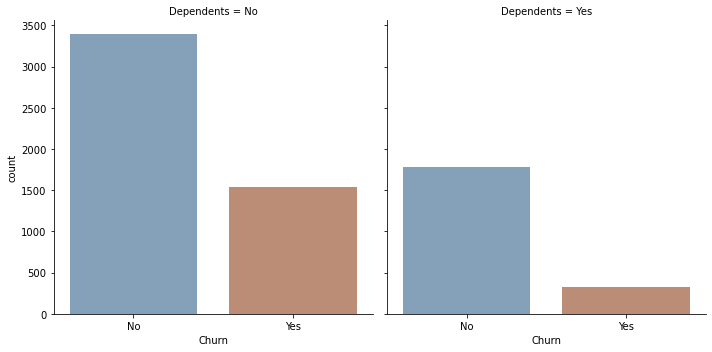

In [58]:
# Checking Churn level in Dependents
sns.catplot(x='Churn',col='Dependents',data=df,palette='twilight_shifted',kind="count")

The customers who do not have any dependency have high churn rate compared to the customers who have dependents.


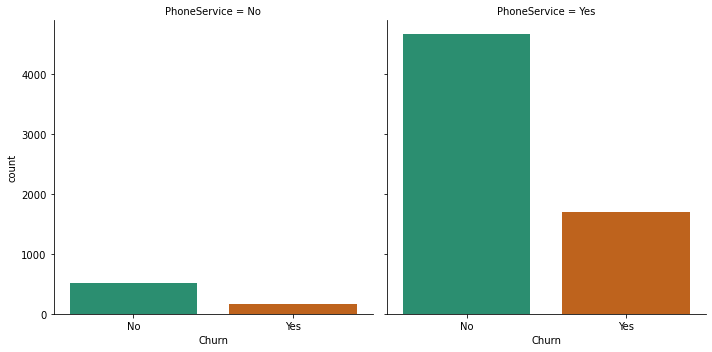

In [59]:
# Checking Churn level in PhoneService
sns.catplot(x='Churn',col='PhoneService',data=df,palette="Dark2",kind="count")
plt.show()


 we can notice the customers who have phone service have high tendency of getting churned.


### Now using encoder to encode the target variable

In [60]:
from sklearn.preprocessing import LabelEncoder

enc=LabelEncoder()

for i in Cat_col:
    df[i]=enc.fit_transform(df[i])
    

In [61]:
df.dtypes

customerID            int32
gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

We can say that all categorical columns are encoded into numerical

# Multivariate Analysis

## Checking for Corrrelation

### Plotting heatmap

In [62]:
df=df.drop(columns=['customerID'],axis=1)

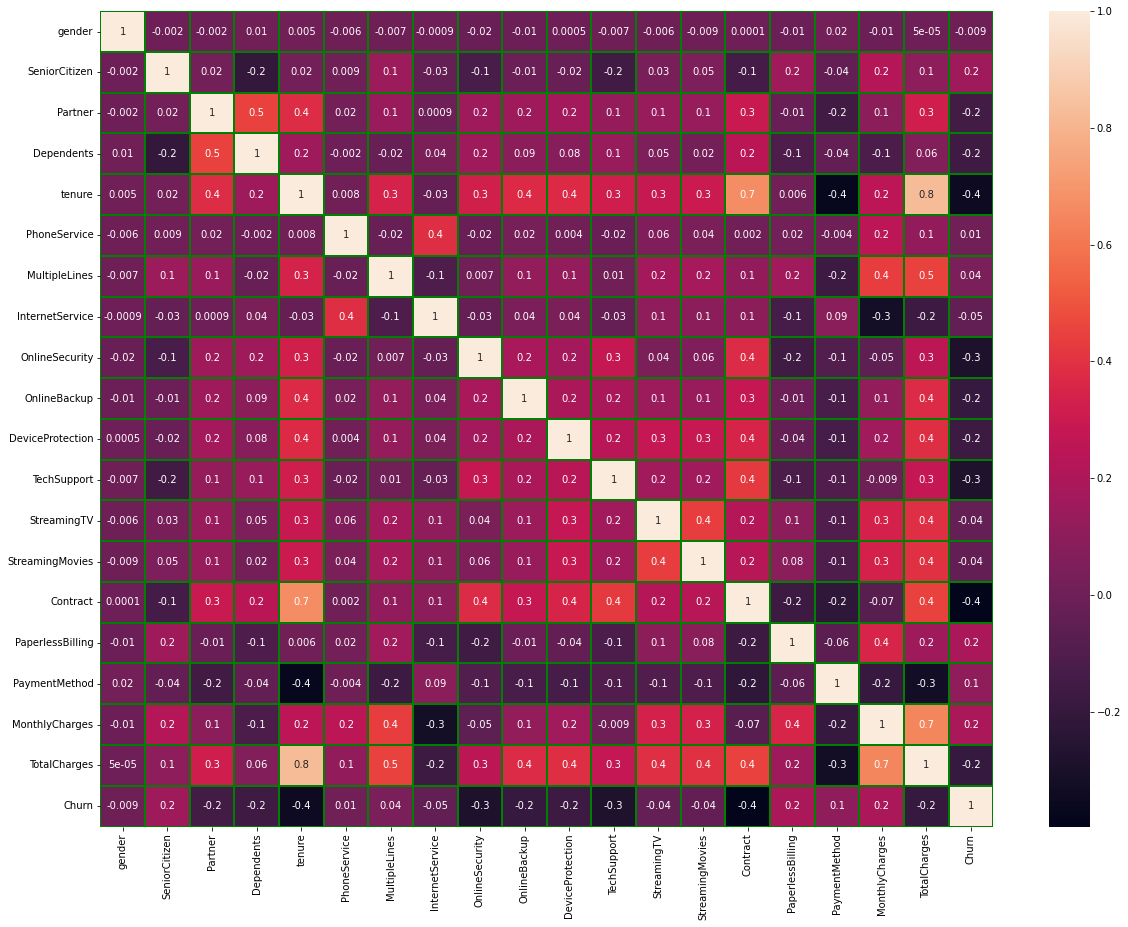

In [63]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths=.1,fmt=".1g",linecolor="green",annot=True)
plt.yticks(rotation=0);

1)This heatmap shows the correlation matrix by visulaizing the data. We can observe the relation between feature to feature and feature to label. This heatmap contains both positive and negative correlation

2)There is no much positive correlation between the target and features.

3)The column MonthlyCharges, PaperlessBilling, SeniorCitizen and PaymentMethod have positive correlation with the Label Column "Churn".

4)The label is negatively correlated with Contract, tenure, OnlineSecurity, TechSupport, TotalCharges, DeviceProtection, OnlineBackup, Partner and Dependents.

5)Also the column gender has very correlation with the label, we can drop it if necessary.

6)The column TotalCharges and tenure, Contract and tenure, TotalCharge and MonthlyCharges and many other columns have high correlation with each other.

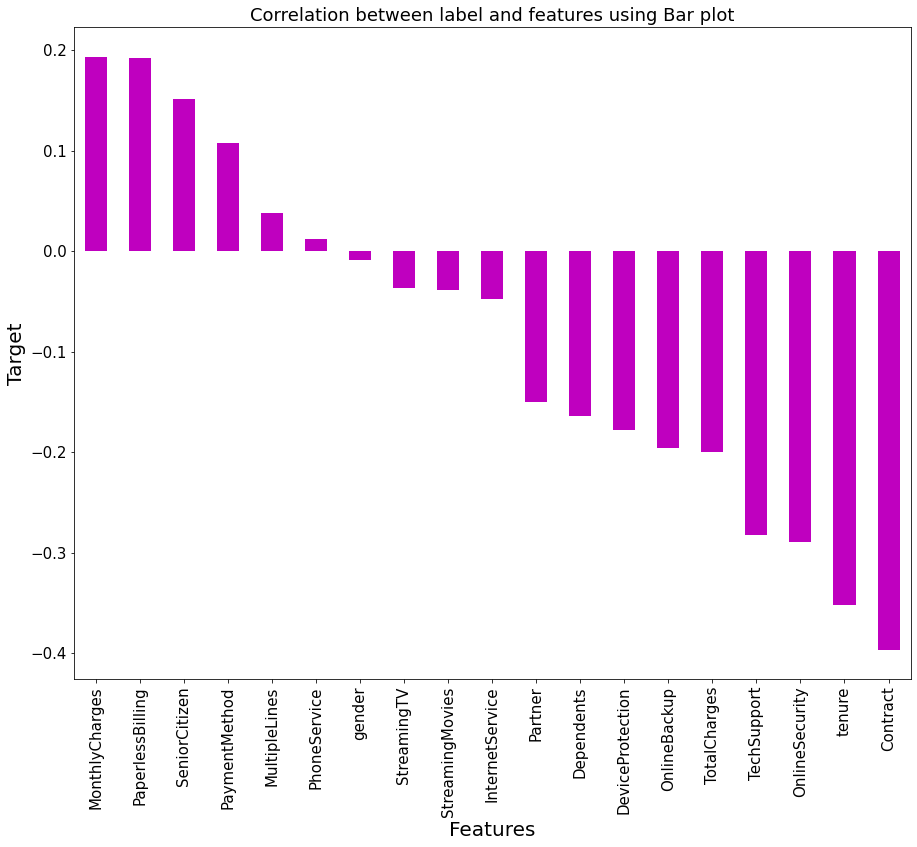

In [64]:
plt.figure(figsize=(15,12))
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color='m',fontsize=15)
plt.xlabel('Features',fontsize=20)
plt.ylabel('Target',fontsize=20)
plt.title('Correlation between label and features using Bar plot',fontsize=18)
plt.show()

From the above bar plot we can notice the positive and negative correlation between the features and the target. Here the features gender and PhoneService have very less correlation with the column.

# Checking Skewess

In [65]:
df_cont.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

Setting skewness limit to -0.65to +0.65

We can observe that only column('TotalCharges') is having skewness value greater than than limit value.

SeniorCitizen is a categorical column

# Checking for Outliers


In [66]:
df_cont.shape


(7043, 4)

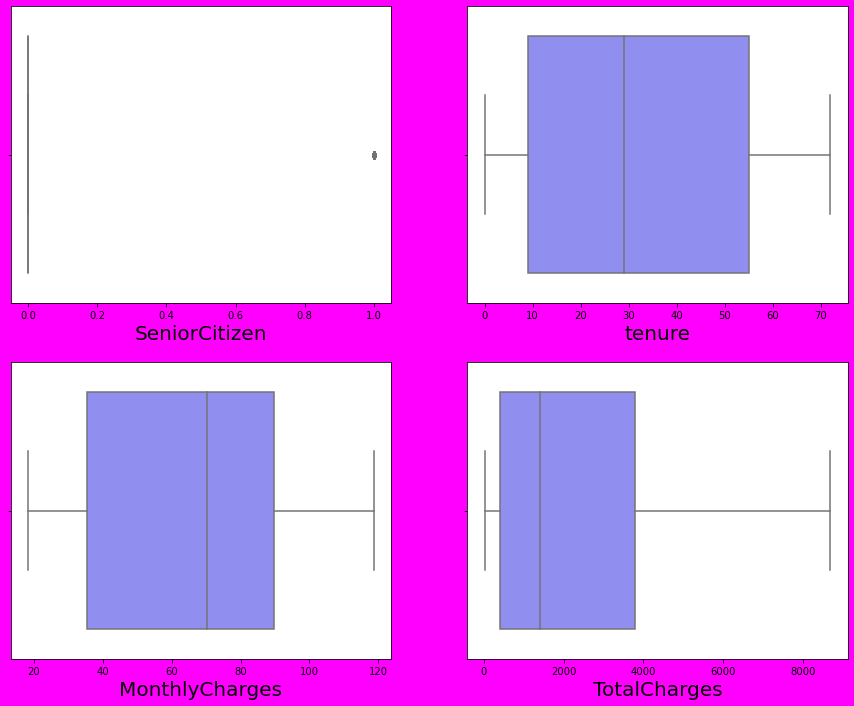

In [67]:
plt.figure(figsize=(15,12),facecolor= 'magenta')
plotnumber = 1


for column in df_cont:
    if plotnumber<=4:
        plt.subplot(2,2,plotnumber)
        ax=sns.boxplot(df_cont[column],palette='cool')
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

The column Senior Citizen has outliers but it contains categorical data so no need to remove outliers. 

Apart from this none of the columns have outliers.



# DataPreprocessing

## Removing skewness using data transforamtion


In [68]:
#Removing skewness using cuberoot method


In [69]:
df['TotalCharges'] = np.cbrt(df['TotalCharges'])

In [70]:
df['TotalCharges'].skew()

0.011168496235150815

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

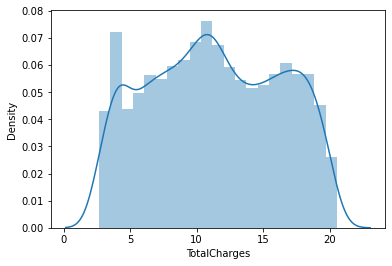

In [71]:
sns.distplot(df['TotalCharges'],)

We can see that skewness has been removed

### Separating features and target variable as x and y


In [72]:
x=df.drop(columns=['Churn'],axis=1)
y=df['Churn']

In [73]:
print(x.shape)
print(y.shape)

(7043, 19)
(7043,)


# Handling imbalanced dataset

In [74]:
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

 We can observe that dataset is imbalanced , we need to balance it

### Over sampling using SMOTE

In [75]:
import sys
from collections import Counter
import joblib
import six
from sklearn.model_selection import train_test_split
sys.modules['sklearn.externals.six']=six
sys.modules['sklearn.externals.joblib']=joblib
from sklearn.model_selection import train_test_split

In [76]:
from imblearn.over_sampling import SMOTE

over_smpl=SMOTE(0.8)
x,y=over_smpl.fit_resample(x,y)

y.value_counts()

0    5174
1    4139
Name: Churn, dtype: int64

# Data Standardisation

In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-0.916002,-0.419208,1.207437,-0.558127,-1.146858,-3.005921,0.066992,-1.231062,-0.793840,1.363827,-0.928898,-0.796738,-1.064724,-1.066227,-0.684996,0.814452,0.423976,-1.277688,-1.587538
1,1.091700,-0.419208,-0.828200,-0.558127,0.218430,0.332677,-0.995867,-1.231062,1.619817,-0.926143,1.355752,-0.796738,-1.064724,-1.066227,0.589094,-1.227819,1.407165,-0.345877,0.300888
2,1.091700,-0.419208,-0.828200,-0.558127,-1.105486,0.332677,-0.995867,-1.231062,1.619817,1.363827,-0.928898,-0.796738,-1.064724,-1.066227,-0.684996,0.814452,1.407165,-0.452468,-1.248553
3,1.091700,-0.419208,-0.828200,-0.558127,0.673526,-3.005921,0.066992,-1.231062,1.619817,-0.926143,1.355752,1.607676,-1.064724,-1.066227,0.589094,-1.227819,-1.542402,-0.849605,0.279018
4,-0.916002,-0.419208,-0.828200,-0.558127,-1.105486,0.332677,-0.995867,0.212696,-0.793840,-0.926143,-0.928898,-0.796738,-1.064724,-1.066227,-0.684996,0.814452,0.423976,0.126905,-1.132667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9308,1.091700,-0.419208,1.207437,-0.558127,1.583718,0.332677,1.129852,0.212696,-0.793840,1.363827,1.355752,1.607676,1.163539,1.162178,0.589094,0.814452,-1.542402,1.480897,1.789246
9309,-0.916002,-0.419208,-0.828200,-0.558127,-0.981369,-3.005921,0.066992,-1.231062,0.412989,-0.926143,0.213427,0.405469,-1.064724,-1.066227,-0.684996,-1.227819,0.423976,-0.927349,-0.936935
9310,-0.916002,-0.419208,-0.828200,-0.558127,-0.733135,0.332677,0.066992,0.212696,-0.793840,-0.926143,-0.928898,-0.796738,1.163539,-1.066227,-0.684996,0.814452,0.423976,0.603589,-0.214274
9311,-0.916002,-0.419208,-0.828200,-0.558127,-0.857252,0.332677,-0.995867,1.656453,0.412989,0.218842,0.213427,0.405469,0.049408,0.047975,-0.684996,-1.227819,1.407165,-1.621209,-1.131996


# Check for multicollierinity

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['vif1']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif

,vif1,features
0,1.011023,gender
1,1.103663,SeniorCitizen
2,1.527466,Partner
3,1.426851,Dependents
4,12.916520,tenure
5,1.703947,PhoneService
6,1.401775,MultipleLines
7,1.784961,InternetService
8,1.328586,OnlineSecurity
9,1.226454,OnlineBackup


By checking VIF values we can find the features causing multicolineraity problem. Here we can find the feature TotalCharges and tenure have VIF value greater than 10 which means they have high correlation with other features. We will drop one of the column first, if the same issue exist then we will try to remove the column having high VIF.

In [79]:
# Dropping TotalCharges column
x.drop("TotalCharges",axis=1,inplace=True)

In [80]:
vif=pd.DataFrame()
vif['vif1']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif

,vif1,features
0,1.011022,gender
1,1.103662,SeniorCitizen
2,1.526111,Partner
3,1.424939,Dependents
4,2.790554,tenure
5,1.703945,PhoneService
6,1.395121,MultipleLines
7,1.749291,InternetService
8,1.320934,OnlineSecurity
9,1.221783,OnlineBackup


So, we have solved multicolinearity issue.We can now move ahead for model building.

# Model Training and Building

# Support Vector Machine(SVM)

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,roc_curve,confusion_matrix

### Finding the best random state

In [85]:
max_acc=0
max_rs=0

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    svm=SVC()
    svm.fit(x_train,y_train)
    pred_svm=svm.predict(x_test)
    accuracy=accuracy_score(y_test,pred_svm)
    
    if accuracy>max_acc:
        max_acc=accuracy
        max_rs=i
print("Best accuracy is ",max_acc,"at random_state",max_rs)
        

Best accuracy is  0.8271604938271605 at random_state 56


In [86]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=56,test_size=0.20)

In [87]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print(f"Accuracy score in training:{accuracy_score(y_train,y_pred)*100:2f}%")
        
    elif train==False:
        pred=clf.predict(x_test)
        print(f"Accuracy score in testing:{accuracy_score(y_test,pred)*100:2f}%")
        
        print("Classification report\n",classification_report(y_test,pred,digits=2))

In [88]:
svm.fit(x_train,y_train)

SVC()

In [89]:
metric_score(svm,x_train,x_test,y_train,y_test,train=True)

Accuracy score in training:82.563758%


In [90]:
metric_score(svm,x_train,x_test,y_train,y_test,train=False)

Accuracy score in testing:82.716049%
Classification report
               precision    recall  f1-score   support

           0       0.85      0.83      0.84      1016
           1       0.80      0.82      0.81       847

    accuracy                           0.83      1863
   macro avg       0.83      0.83      0.83      1863
weighted avg       0.83      0.83      0.83      1863



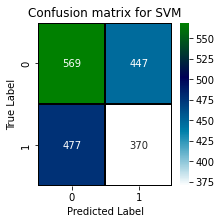

In [91]:
# Lets plot confusion matrix for SVM
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(y_test,pred_svm)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]
f , ax = plt.subplots(figsize=(3,3))
sns.heatmap(conf_mat,annot=True,linewidths=.2,linecolor="black",fmt=".0f",ax=ax,cmap="ocean_r",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix for SVM")
plt.show()

# Random Forest

In [92]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()

rf.fit(x_train,y_train)

RandomForestClassifier()

In [93]:
metric_score(rf,x_train,x_test,y_train,y_test,train=True)

Accuracy score in training:99.825503%


In [94]:
metric_score(rf,x_train,x_test,y_train,y_test,train=False)

Accuracy score in testing:84.326355%
Classification report
               precision    recall  f1-score   support

           0       0.85      0.86      0.86      1016
           1       0.83      0.82      0.83       847

    accuracy                           0.84      1863
   macro avg       0.84      0.84      0.84      1863
weighted avg       0.84      0.84      0.84      1863



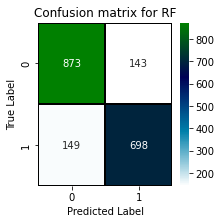

In [95]:
# Lets plot confusion matrix for RF
pred_rf=rf.predict(x_test)
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(y_test,pred_rf)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]
f , ax = plt.subplots(figsize=(3,3))
sns.heatmap(conf_mat,annot=True,linewidths=.2,linecolor="black",fmt=".0f",ax=ax,cmap="ocean_r",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix for RF")
plt.show()


# KNN

In [96]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()

knn.fit(x_train,y_train)

KNeighborsClassifier()

In [97]:
metric_score(knn,x_train,x_test,y_train,y_test,train=True)

Accuracy score in training:84.026846%


In [98]:
metric_score(knn,x_train,x_test,y_train,y_test,train=False)

Accuracy score in testing:77.724101%
Classification report
               precision    recall  f1-score   support

           0       0.82      0.76      0.79      1016
           1       0.73      0.80      0.77       847

    accuracy                           0.78      1863
   macro avg       0.78      0.78      0.78      1863
weighted avg       0.78      0.78      0.78      1863



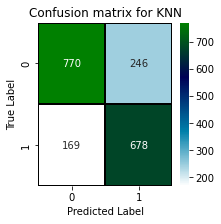

In [99]:
# Lets plot confusion matrix for KNN
pred_knn=knn.predict(x_test)
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(y_test,pred_knn)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]
f , ax = plt.subplots(figsize=(3,3))
sns.heatmap(conf_mat,annot=True,linewidths=.2,linecolor="black",fmt=".0f",ax=ax,cmap="ocean_r",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix for KNN")
plt.show()


# Ada Boosting

In [100]:
from sklearn.ensemble import AdaBoostClassifier

ada=AdaBoostClassifier()

ada.fit(x_train,y_train)

AdaBoostClassifier()

In [101]:
metric_score(ada,x_train,x_test,y_train,y_test,train=True)

Accuracy score in training:79.382550%


In [102]:
metric_score(ada,x_train,x_test,y_train,y_test,train=False)

Accuracy score in testing:81.427805%
Classification report
               precision    recall  f1-score   support

           0       0.85      0.80      0.83      1016
           1       0.78      0.83      0.80       847

    accuracy                           0.81      1863
   macro avg       0.81      0.82      0.81      1863
weighted avg       0.82      0.81      0.81      1863



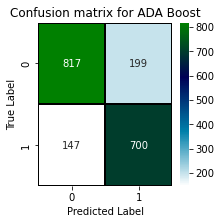

In [103]:
# Lets plot confusion matrix for ADA Boost
pred_ada=ada.predict(x_test)
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(y_test,pred_ada)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]
f , ax = plt.subplots(figsize=(3,3))
sns.heatmap(conf_mat,annot=True,linewidths=.2,linecolor="black",fmt=".0f",ax=ax,cmap="ocean_r",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix for ADA Boost")
plt.show()

# Logistic Regression


In [104]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()

lr.fit(x_train,y_train)

LogisticRegression()

In [105]:
metric_score(lr,x_train,x_test,y_train,y_test,train=True)

Accuracy score in training:78.228188%


In [106]:
metric_score(lr,x_train,x_test,y_train,y_test,train=False)

Accuracy score in testing:79.978529%
Classification report
               precision    recall  f1-score   support

           0       0.83      0.80      0.81      1016
           1       0.77      0.80      0.78       847

    accuracy                           0.80      1863
   macro avg       0.80      0.80      0.80      1863
weighted avg       0.80      0.80      0.80      1863



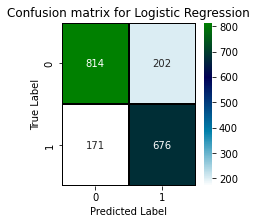

In [107]:
# Lets plot confusion matrix for Logistic Reg
pred_lr=lr.predict(x_test)
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(y_test,pred_lr)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]
f , ax = plt.subplots(figsize=(3,3))
sns.heatmap(conf_mat,annot=True,linewidths=.2,linecolor="black",fmt=".0f",ax=ax,cmap="ocean_r",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix for Logistic Regression")
plt.show()

# Decision Tree

In [108]:
from sklearn.tree import DecisionTreeClassifier

In [109]:
dt=DecisionTreeClassifier()

In [110]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [111]:
metric_score(dt,x_train,x_test,y_train,y_test,train=True)

Accuracy score in training:99.825503%


In [112]:
metric_score(dt,x_train,x_test,y_train,y_test,train=False)

Accuracy score in testing:77.509393%
Classification report
               precision    recall  f1-score   support

           0       0.80      0.78      0.79      1016
           1       0.74      0.77      0.76       847

    accuracy                           0.78      1863
   macro avg       0.77      0.77      0.77      1863
weighted avg       0.78      0.78      0.78      1863



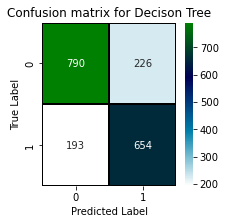

In [113]:
# Lets plot confusion matrix for Decision Tree
pred_dt=dt.predict(x_test)
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(y_test,pred_dt)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]
f , ax = plt.subplots(figsize=(3,3))
sns.heatmap(conf_mat,annot=True,linewidths=.2,linecolor="black",fmt=".0f",ax=ax,cmap="ocean_r",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix for Decison Tree")
plt.show()

# Cross Validation Score

### Finding best Cross validation value

In [114]:
pred_rf=rf.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_rf)
for j in range(2,10):
    cv_score=cross_val_score(rf,x,y,cv=j)
    cv_score_mean=cv_score.mean()
    print("cv at ", j)
    print("Cross validation score is :-", cv_score_mean*100)
    print()

cv at  2
Cross validation score is :- 79.60962905857272

cv at  3
Cross validation score is :- 81.64994106612214

cv at  4
Cross validation score is :- 82.12237214473419

cv at  5
Cross validation score is :- 82.1659162859991

cv at  6
Cross validation score is :- 82.35858210358845

cv at  7
Cross validation score is :- 82.70369225629277

cv at  8
Cross validation score is :- 82.6055631756707

cv at  9
Cross validation score is :- 82.78886096030715



In [115]:
from sklearn.model_selection import cross_val_score

lssscore_selected=cross_val_score(svm,x,y,cv=5).mean()
print("the cross validation score for SVM is ",lssscore_selected)

lssscore_selected=cross_val_score(knn,x,y,cv=5).mean()
print("the cross validation score for KNN is ",lssscore_selected)

lssscore_selected=cross_val_score(ada,x,y,cv=5).mean()
print("the cross validation score for ADA is ",lssscore_selected)

lssscore_selected=cross_val_score(rf,x,y,cv=5).mean()
print("the cross validation score for RF is ",lssscore_selected)

lssscore_selected=cross_val_score(lr,x,y,cv=5).mean()
print("the cross validation score for LR is ",lssscore_selected)

lssscore_selected=cross_val_score(dt,x,y,cv=5).mean()
print("the cross validation score for DT is ",lssscore_selected)



the cross validation score for SVM is  0.7956709694641481
the cross validation score for KNN is  0.7685014814468885
the cross validation score for ADA is  0.788690151880737
the cross validation score for RF is  0.8215518667845136
the cross validation score for LR is  0.7822462182601662
the cross validation score for DT is  0.7715106145856936


# Conclusion

We can observe that at random state 56 and cv=5

SVM

------Testing Accuracy:82.71 and Cross val score:79.56--------

Random Forest

------Testing Accuracy:84.32 and Cross val score:82.15--------

KNN

------Testing Accuracy:77.73 and Cross val score:76.85--------

ADA Boosting

------ Testing Accuracy:81.42 and Cross val score:78.86--------

Logistic Regression

------ Testing Accuracy:79.97 and Cross val score:78.22--------

Decison Tree

------- Testing Accuracy:77.50 and Cross val score:77.15--------

# Plotting AUC ROC Curve for all models

Text(0.5, 1.0, 'Recieving operating characterstics')

<Figure size 1152x648 with 0 Axes>

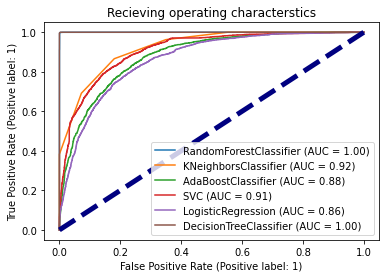

In [121]:
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve
# Plotting for all the models used here
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 


plt.figure(figsize=(16,9))
disp=plot_roc_curve(rf,x_train,y_train)
plot_roc_curve(knn,x_train,y_train,ax=disp.ax_)
plot_roc_curve(ada,x_train,y_train,ax=disp.ax_)
plot_roc_curve(svm,x_train,y_train,ax=disp.ax_)
plot_roc_curve(lr,x_train,y_train,ax=disp.ax_)
plot_roc_curve(dt,x_train,y_train,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.plot([0,1],[0,1],color='navy',lw=5,linestyle='--')
plt.title('Recieving operating characterstics')


### We can say that Decision Tree is the best model because it has maximum AUC Score and least difference between Testing accuracy and cross validation score

# Hyperparameter Tuning

In [126]:
from sklearn.model_selection import GridSearchCV

In [129]:
params={ 'criterion':['gini','entropy'],
            'max_depth':range(2,20),
            'min_samples_leaf':range(2,10),
            'min_samples_split':range(2,15),
            'max_leaf_nodes':range(5,20),
           'max_features':["auto","sqrt","log2"],
           'splitter':["best",'random']}


In [130]:
grd=GridSearchCV(estimator=dt,param_grid=params,n_jobs=-1)

In [131]:
grd.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 20),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': range(5, 20),
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 15),
                         'splitter': ['best', 'random']})

In [132]:
print('best_parameters',grd.best_params_)

best_parameters {'criterion': 'gini', 'max_depth': 18, 'max_features': 'auto', 'max_leaf_nodes': 15, 'min_samples_leaf': 6, 'min_samples_split': 2, 'splitter': 'best'}


In [133]:
final_model=DecisionTreeClassifier(criterion='gini',max_depth=18,max_features='auto',max_leaf_nodes=15,min_samples_leaf=6,min_samples_split=2,splitter='best')

In [134]:
final_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=18, max_features='auto', max_leaf_nodes=15,
                       min_samples_leaf=6)

In [135]:
metric_score(final_model,x_train,x_test,y_train,y_test,train=True)

Accuracy score in training:76.818792%


In [136]:
metric_score(final_model,x_train,x_test,y_train,y_test,train=False)

Accuracy score in testing:78.529254%
Classification report
               precision    recall  f1-score   support

           0       0.79      0.83      0.81      1016
           1       0.79      0.73      0.75       847

    accuracy                           0.79      1863
   macro avg       0.79      0.78      0.78      1863
weighted avg       0.79      0.79      0.78      1863



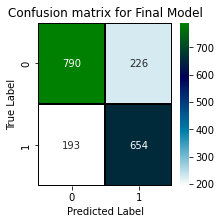

In [137]:
# Lets plot confusion matrix for Final Model
pred_final=final_model.predict(x_test)
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(y_test,pred_dt)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]
f , ax = plt.subplots(figsize=(3,3))
sns.heatmap(conf_mat,annot=True,linewidths=.2,linecolor="black",fmt=".0f",ax=ax,cmap="ocean_r",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix for Final Model")
plt.show()

We can see that testing accuracy is increased after after hyperparameter tuning

In [138]:
lssscore_selected=cross_val_score(final_model,x,y,cv=5).mean()*100
print("the cross validation score for Final Model is ",lssscore_selected)


the cross validation score for Final Model is  75.28273178921539


# Saving the best model

In [139]:
import pickle
pickle.dump(final_model,open('classmodel_Churn_telecom','wb'))